# Triangular Z2 demo (Energy spectrum and ground-state distributions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from heavyhex_qft.triangular_z2 import TriangularZ2Lattice

## 2 plaquettes

In [2]:
configuration = '''
 *
* *
 *
'''
lattice = TriangularZ2Lattice(configuration)

### Graph representing the physics lattice

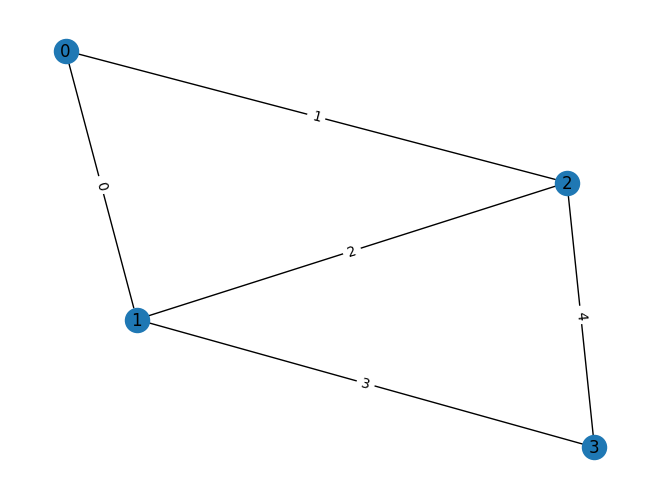

In [3]:
lattice.draw_graph()

### Graph representing the qubit mapping

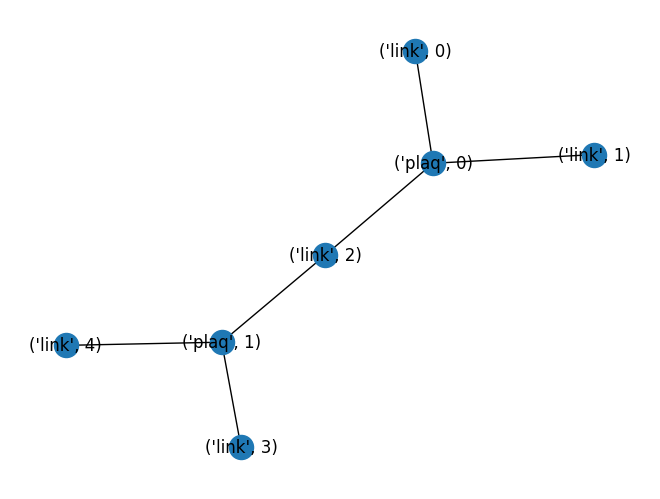

In [4]:
lattice.draw_qubit_graph()

In [5]:
hamiltonian = lattice.make_hamiltonian(0.5)

flt = lattice.charge_subspace([0] * lattice.num_vertices)
subspace_hamiltonian = hamiltonian.to_matrix()[flt[:, None], flt[None, :]]
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

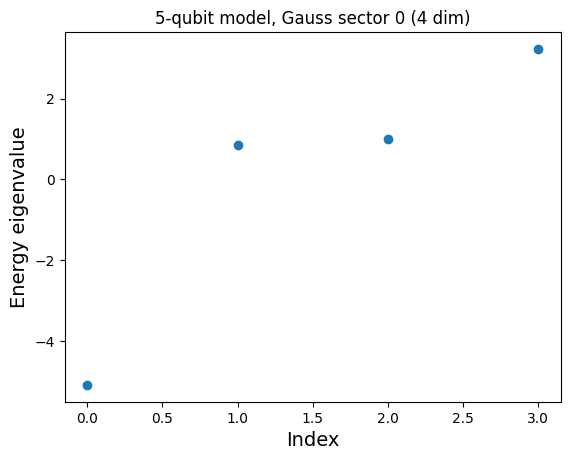

In [6]:
plt.scatter(np.arange(evals.shape[0]), evals)
plt.title('5-qubit model, Gauss sector 0 (4 dim)')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Energy eigenvalue', fontsize=14)

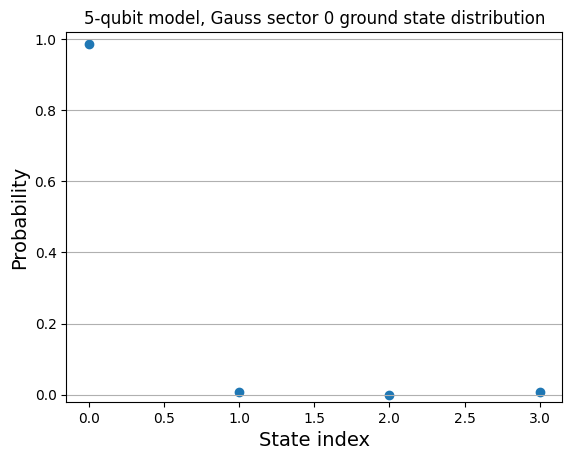

In [7]:
plt.scatter(np.arange(evals.shape[0]), np.square(np.abs(evecs[:, 0])))
plt.title('5-qubit model, Gauss sector 0 ground state distribution')
plt.xlabel('State index', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

## 6 plaquettes, Gauss sector 0

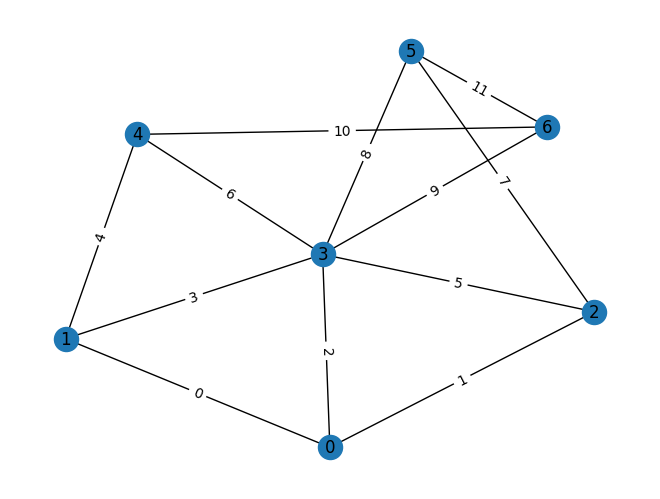

In [8]:
configuration = '''
 * *
* * *
 * *
'''
lattice = TriangularZ2Lattice(configuration)

lattice.draw_graph()

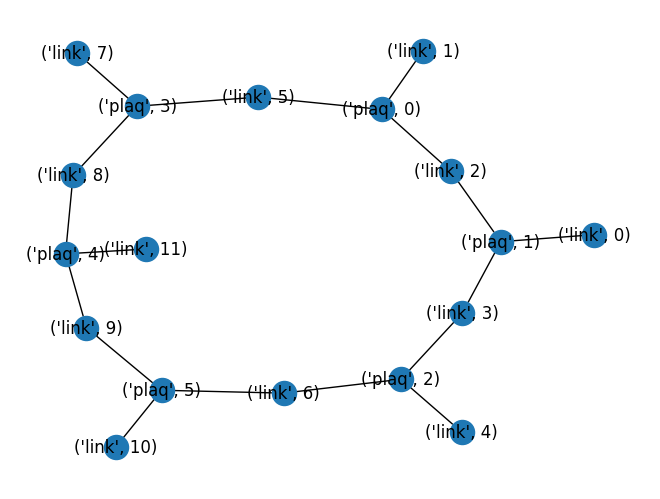

In [9]:
lattice.draw_qubit_graph()

In [10]:
hamiltonian = lattice.make_hamiltonian(0.5)

flt = lattice.charge_subspace([0] * lattice.num_vertices)
subspace_hamiltonian = hamiltonian.to_matrix()[flt[:, None], flt[None, :]]
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

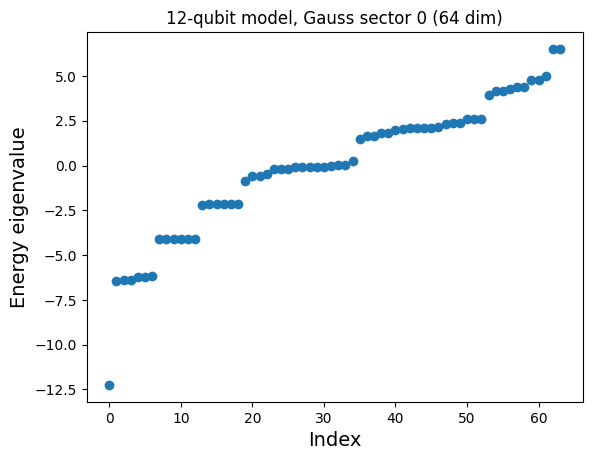

In [11]:
indices = np.arange(evals.shape[0])
plt.scatter(indices, evals)
plt.title('12-qubit model, Gauss sector 0 (64 dim)')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Energy eigenvalue', fontsize=14)

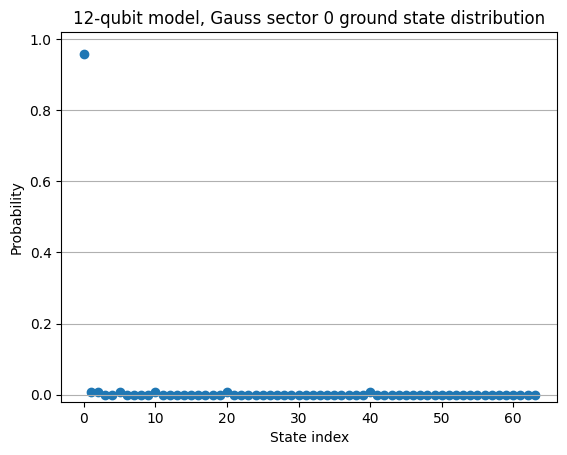

In [12]:
gs_probs = np.square(np.abs(evecs[:, 0]))
plt.scatter(indices, gs_probs)
plt.title('12-qubit model, Gauss sector 0 ground state distribution')
plt.xlabel('State index')
plt.ylabel('Probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

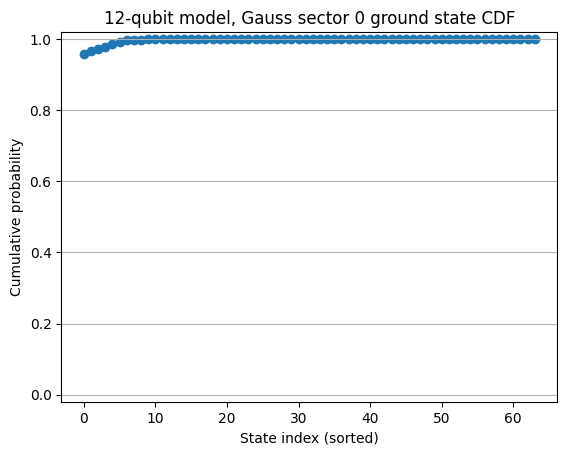

In [13]:
sorted_prob = np.sort(gs_probs)[::-1]
gs_cumul = np.cumsum(sorted_prob)
plt.scatter(indices, gs_cumul)
plt.title('12-qubit model, Gauss sector 0 ground state CDF')
plt.xlabel('State index (sorted)')
plt.ylabel('Cumulative probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

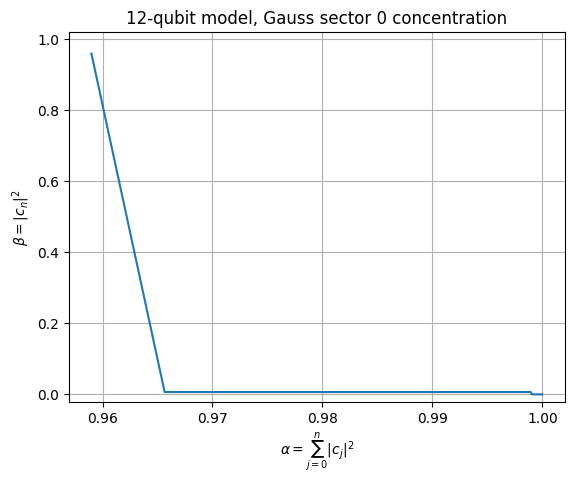

In [14]:
plt.plot(gs_cumul, sorted_prob)
plt.title('12-qubit model, Gauss sector 0 concentration')
plt.xlabel(r'$\alpha = \sum_{j=0}^{n} |c_j|^2$')
plt.ylabel(r'$\beta = |c_n|^2$')
plt.ylim(-0.02, 1.02)
plt.grid(True)

## 6 plaquettes, Gauss sector 1 (two odd vertices)

In [15]:
configuration = '''
 * *
* * *
 * *
'''
lattice = TriangularZ2Lattice(configuration)

hamiltonian = lattice.make_hamiltonian(0.5)

target_parity = [0] * lattice.num_vertices
target_parity[0] = 1
target_parity[6] = 1
flt = lattice.charge_subspace(target_parity)
subspace_hamiltonian = hamiltonian.to_matrix()[flt[:, None], flt[None, :]]
evals, evecs = np.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

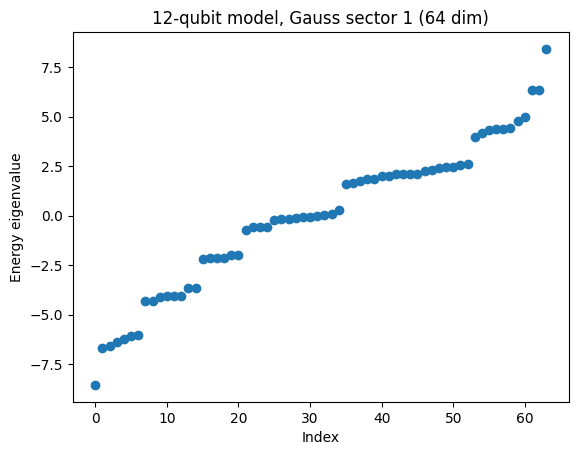

In [16]:
indices = np.arange(evals.shape[0])
plt.scatter(indices, evals)
plt.title('12-qubit model, Gauss sector 1 (64 dim)')
plt.xlabel('Index')
plt.ylabel('Energy eigenvalue')

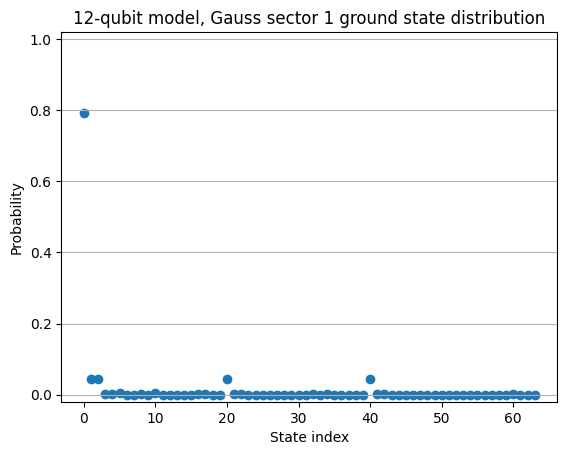

In [17]:
gs_probs = np.square(np.abs(evecs[:, 0]))
plt.scatter(indices, gs_probs)
plt.title('12-qubit model, Gauss sector 1 ground state distribution')
plt.xlabel('State index')
plt.ylabel('Probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

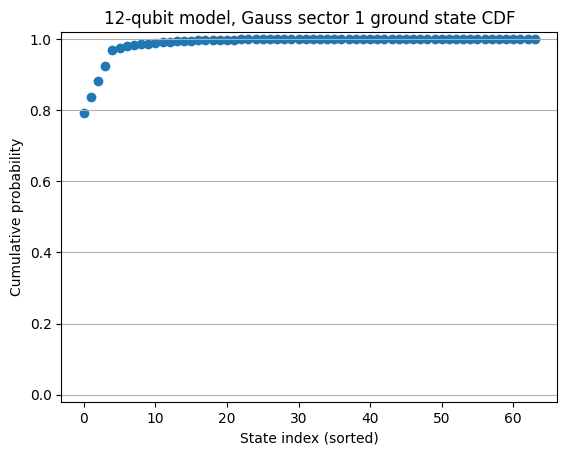

In [18]:
sorted_prob = np.sort(gs_probs)[::-1]
gs_cumul = np.cumsum(sorted_prob)
plt.scatter(indices, gs_cumul)
plt.title('12-qubit model, Gauss sector 1 ground state CDF')
plt.xlabel('State index (sorted)')
plt.ylabel('Cumulative probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

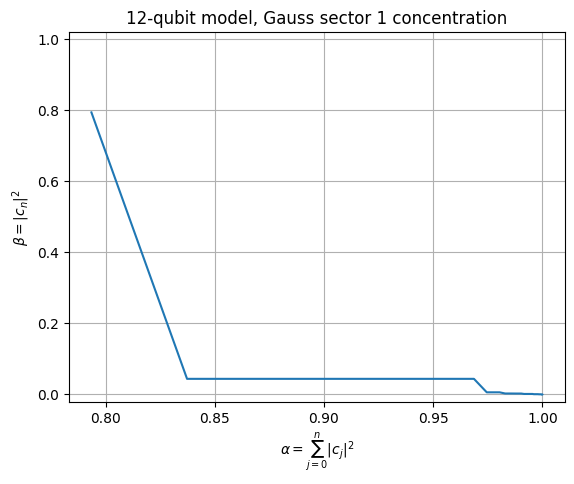

In [19]:
plt.plot(gs_cumul, sorted_prob)
plt.title('12-qubit model, Gauss sector 1 concentration')
plt.xlabel(r'$\alpha = \sum_{j=0}^{n} |c_j|^2$')
plt.ylabel(r'$\beta = |c_n|^2$')
plt.ylim(-0.02, 1.02)
plt.grid(True)

## 14 plaquettes

In [20]:
configuration = '''
 * * * *
* * * * *
 * * * *
'''
lattice = TriangularZ2Lattice(configuration)

hamiltonian = lattice.make_hamiltonian(0.5)
target_parity = [0] * lattice.num_vertices
target_parity[4] = 1
target_parity[8] = 1
flt = lattice.charge_subspace(target_parity)
subspace_hamiltonian = hamiltonian.to_matrix(sparse=True)[flt[:, None], flt[None, :]]
subspace_hamiltonian = jnp.array(subspace_hamiltonian.todense())
evals, evecs = jnp.linalg.eigh(subspace_hamiltonian)

Text(0, 0.5, 'Energy eigenvalue')

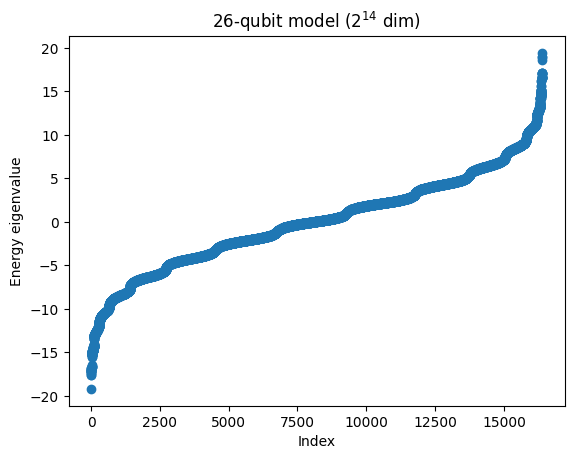

In [21]:
indices = np.arange(evals.shape[0])
plt.scatter(indices, evals)
plt.title('26-qubit model ($2^{14}$ dim)')
plt.xlabel('Index')
plt.ylabel('Energy eigenvalue')

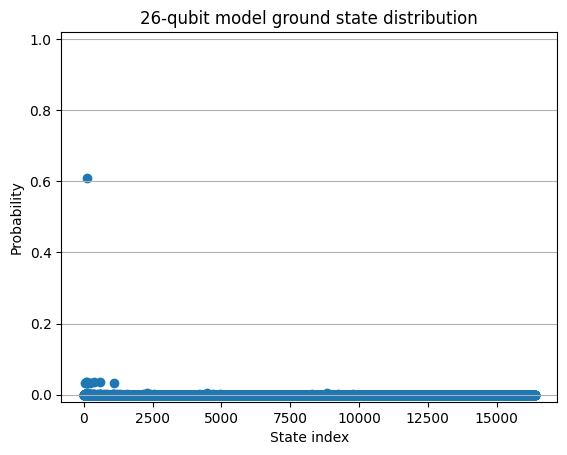

In [22]:
gs_probs = jnp.square(jnp.abs(evecs[:, 0]))
plt.scatter(indices, gs_probs)
plt.title('26-qubit model ground state distribution')
plt.xlabel('State index')
plt.ylabel('Probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

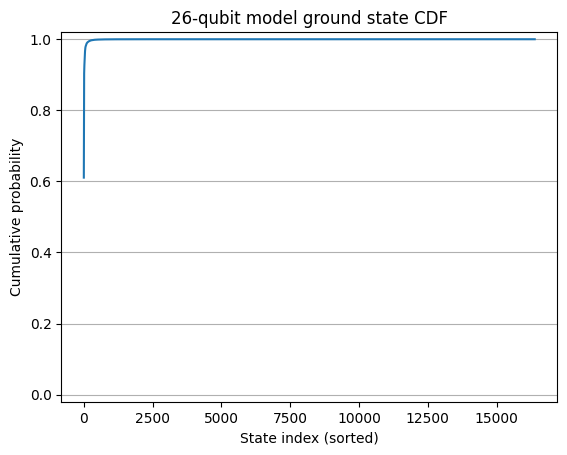

In [23]:
sorted_prob = np.sort(gs_probs)[::-1]
gs_cumul = np.cumsum(sorted_prob)
plt.plot(indices, gs_cumul)
plt.title('26-qubit model ground state CDF')
plt.xlabel('State index (sorted)')
plt.ylabel('Cumulative probability')
plt.ylim(-0.02, 1.02)
plt.grid(True, axis='y')

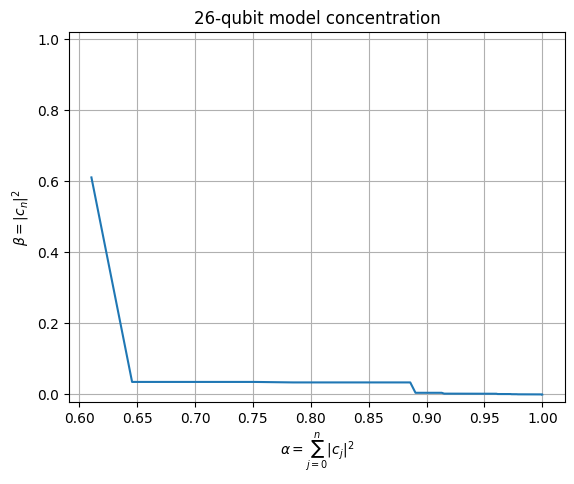

In [24]:
plt.plot(gs_cumul, sorted_prob)
plt.title('26-qubit model concentration')
plt.xlabel(r'$\alpha = \sum_{j=0}^{n} |c_j|^2$')
plt.ylabel(r'$\beta = |c_n|^2$')
plt.ylim(-0.02, 1.02)
plt.grid(True)

## Coupling scan with 10 plaquettes

In [25]:
configuration = '''
 * * *
* * * *
 * * *
'''
lattice = TriangularZ2Lattice(configuration)
flt = lattice.charge_subspace([0] * lattice.num_vertices)

kvals = np.linspace(0.01, 4.01, 100, endpoint=False)
sat_points = np.empty_like(kvals)

for ik, kval in enumerate(kvals):
    hamiltonian = lattice.make_hamiltonian(kval)
    subspace_hamiltonian = hamiltonian.to_matrix(sparse=True)[flt[:, None], flt[None, :]]
    subspace_hamiltonian = jnp.array(subspace_hamiltonian.todense())
    evals, evecs = jnp.linalg.eigh(subspace_hamiltonian)
    gs_probs = jnp.square(jnp.abs(evecs[:, 0]))
    sorted_prob = np.sort(gs_probs)[::-1]
    gs_cumul = np.cumsum(sorted_prob)
    sat_points[ik] = gs_cumul.searchsorted(0.999)

Text(0.5, 0, 'K')

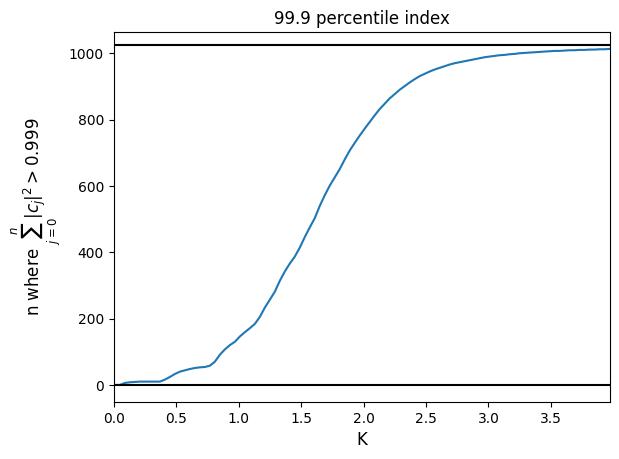

In [26]:
plt.plot(kvals, sat_points)
plt.title('99.9 percentile index')
plt.axhline(0., color='black')
plt.axhline(flt.shape[0], color='black')
plt.xlim(0., kvals[-1])
plt.ylabel('n where $\sum_{j=0}^{n} |c_j|^2 > 0.999$', fontsize=12)
plt.xlabel('K', fontsize=12)

## Charge position scan with 14 plaquettes

In [27]:
configuration = '''
 * * * *
* * * * *
 * * * *
'''
lattice = TriangularZ2Lattice(configuration)
hamiltonian = lattice.make_hamiltonian(0.5)

gs_energies = []
for charge_pos in range(5, 9):
    target_parity = [0] * lattice.num_vertices
    target_parity[4] = 1
    target_parity[charge_pos] = 1
    flt = lattice.charge_subspace(target_parity)
    subspace_hamiltonian = hamiltonian.to_matrix(sparse=True)[flt[:, None], flt[None, :]]
    subspace_hamiltonian = jnp.array(subspace_hamiltonian.todense())
    evals, evecs = jnp.linalg.eigh(subspace_hamiltonian)
    gs_energies.append(evals[0])

Text(0, 0.5, 'E_0')

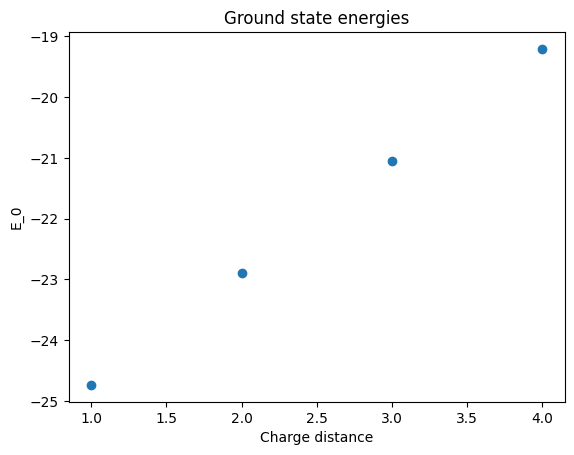

In [28]:
plt.scatter(np.arange(1, 5), np.array(gs_energies))
plt.title('Ground state energies')
plt.xlabel('Charge distance')
plt.ylabel('E_0')